# Atividade de MLP

Nesta atividade, exploramos redes neurais multicamadas (MLPs) usando apenas NumPy. O objetivo é compreender o funcionamento de um perceptron multicamadas através de cálculos manuais e depois construir redes neurais simples para classificar dados sintéticos. A implementação não usa bibliotecas de aprendizado de máquina de alto nível. Todas as operações de ativação, perda e gradiente são codificadas diretamente.


## Exercício 1: Cálculo manual de uma MLP

Considere uma MLP simples com duas entradas, uma camada oculta com dois neurônios e um neurônio de saída. A função de ativação da camada oculta e da saída é a tangente hiperbólica. A função de perda é o erro quadrático médio (MSE):
\[L = \frac{1}{2}(y - \hat{y})^2\], onde \(\hat{y}\) é a saída da rede.

Valores fornecidos:

- **Entradas e saída desejada:** \(x = [0{,}5,\,-0{,}2]\), \(y=1{,}0\).
- **Pesos da camada oculta:**

  \[W^{(1)} = \begin{bmatrix}
 0{,}3 & -0{,}1 \\
 0{,}2 & 0{,}4
 \end{bmatrix}\]

- **Vieses da camada oculta:** \(b^{(1)} = [0{,}1,\,-0{,}2]\).
- **Pesos da camada de saída:** \(W^{(2)} = [0{,}5,\,-0{,}3]\).
- **Viés da camada de saída:** \(b^{(2)} = 0{,}2\).
- **Taxa de aprendizado:** \(\eta = 0{,}1\).

O objetivo é calcular passo a passo o percurso pelo grafo computacional: pré ativações, ativações, perda, gradientes de todos os pesos e vieses, e as atualizações de parâmetros usando descida de gradiente.


### Passo 1 – Passagem direta

1. **Pré ativações da camada oculta:**  
   \[
   z^{(1)} = W^{(1)} x + b^{(1)}
   \]
   Calculando:
   \[
   z^{(1)} = \begin{bmatrix}0{,}3 & -0{,}1 \\
 0{,}2 & 0{,}4\end{bmatrix}\cdot\begin{bmatrix}0{,}5 \\ -0{,}2\end{bmatrix}+\begin{bmatrix}0{,}1 \\ -0{,}2\end{bmatrix}
   = \begin{bmatrix}0{,}27 \\ -0{,}18\end{bmatrix}.
   \]

2. **Ativações da camada oculta:** usa a tangente hiperbólica \(\tanh(z)\). Para cada elemento:
   \[
   a^{(1)}_1 = \tanh(0{,}27) \approx 0{,}2636, \quad a^{(1)}_2 = \tanh(-0{,}18) \approx -0{,}1781.
   \]
   Portanto \(a^{(1)} = [0{,}2636,\,-0{,}1781]\).

3. **Pré ativação da saída:**  
   \[
   z^{(2)} = W^{(2)} a^{(1)} + b^{(2)} = [0{,}5,\,-0{,}3]\cdot\begin{bmatrix}0{,}2636 \\ -0{,}1781\end{bmatrix}+0{,}2 \approx 0{,}3852.
   \]

4. **Saída final:** \(\hat{y} = \tanh(z^{(2)})\). Como \(z^{(2)} \approx 0{,}3852\), então
   \[
   \hat{y} = \tanh(0{,}3852) \approx 0{,}3672.
   \]


### Passo 2 – Cálculo da perda

A perda é o erro quadrático médio para uma única amostra:
\[
L = \frac{1}{2}(y - \hat{y})^2 = \frac{1}{2}(1{,}0 - 0{,}3672)^2 \approx 0{,}2002.
\]


### Passo 3 – Retropropagação

Para atualizar os parâmetros, calcula se o gradiente da perda em relação a cada peso e viés.

1. **Gradiente no neurônio de saída:**

   - Derivada da perda em relação à saída predita: \(\frac{\partial L}{\partial \hat{y}} = \hat{y} - y\).
   - Derivada da tangente hiperbólica: \(\frac{\mathrm{d}}{\mathrm{d}z} \tanh(z) = 1 - \tanh^2(z)\).

   Assim, o erro na saída (\(\delta^{(2)}\)) é
   \[
   \delta^{(2)} = (\hat{y} - y) \cdot \bigl(1 - \hat{y}^2\bigr) \approx (0{,}3672 - 1{,}0)\cdot (1 - 0{,}3672^2) \approx -0{,}5474.
   \]

   - **Gradiente dos pesos da saída:**
     \[
     \frac{\partial L}{\partial W^{(2)}} = \delta^{(2)}\,a^{(1)} \approx -0{,}5474 \times [0{,}2636,\,-0{,}1781] \approx [-0{,}1443,\,0{,}0975].
     \]
   - **Gradiente do viés da saída:** \(\frac{\partial L}{\partial b^{(2)}} = \delta^{(2)} \approx -0{,}5474\).

2. **Propagação para a camada oculta:**

   O erro em cada neurônio oculto (\(\delta^{(1)}\)) é obtido multiplicando \(\delta^{(2)}\) pelos pesos da saída e pela derivada da tangente hiperbólica nos neurônios ocultos:
   \[
   \delta^{(1)} = \bigl(\delta^{(2)}\,W^{(2)}\bigr) \circ \bigl(1 - (a^{(1)})^2\bigr),
   \]
   onde \(\circ\) indica produto elemento a elemento. Assim:
   \[
   \delta^{(1)} \approx [-0{,}2547,\,0{,}1590].
   \]
   - **Gradiente dos pesos da camada oculta:**
     \[
     \frac{\partial L}{\partial W^{(1)}} = \delta^{(1)}\,x^\top \approx
     \begin{bmatrix}
     -0{,}1273 & 0{,}0509 \\
      0{,}0795 & -0{,}0318
     \end{bmatrix}.
     \]
   - **Gradiente dos vieses da camada oculta:** \(\frac{\partial L}{\partial b^{(1)}} = \delta^{(1)} \approx [-0{,}2547,\,0{,}1590].\)


### Passo 4 – Atualização dos parâmetros

A atualização usa descida de gradiente simples com taxa de aprendizado \(\eta = 0{,}1\). Para cada parâmetro \(\theta\):
\[\theta \gets \theta - \eta\,\frac{\partial L}{\partial \theta}.\]

Calculando as novas variáveis:

- **Atualização de \(W^{(2)}\):**
  \[
  W^{(2)}_{\text{novo}} = W^{(2)} - \eta\,\frac{\partial L}{\partial W^{(2)}} = [0{,}5,\,-0{,}3] - 0{,}1\times [-0{,}1443,\,0{,}0975] \approx [0{,}5144,\,-0{,}3097].
  \]

- **Atualização de \(b^{(2)}\):**
  \[
  b^{(2)}_{\text{novo}} = 0{,}2 - 0{,}1\times(-0{,}5474) \approx 0{,}2547.
  \]

- **Atualização de \(W^{(1)}\):**
  \[
  W^{(1)}_{\text{novo}} = W^{(1)} - 0{,}1\times
     \begin{bmatrix}
     -0{,}1273 & 0{,}0509 \\
      0{,}0795 & -0{,}0318
     \end{bmatrix}
     = \begin{bmatrix}
     0{,}3 & -0{,}1 \\
     0{,}2 & 0{,}4
     \end{bmatrix} - 0{,}1\times
     \begin{bmatrix}
     -0{,}1273 & 0{,}0509 \\
      0{,}0795 & -0{,}0318
     \end{bmatrix}
     \approx \begin{bmatrix}0{,}3127 & -0{,}1051\\0{,}1920 & 0{,}4032\end{bmatrix}.
     \]

- **Atualização de \(b^{(1)}\):**
  \[
  b^{(1)}_{\text{novo}} = b^{(1)} - 0{,}1\times [-0{,}2547,\,0{,}1590] \approx [0{,}1255,\,-0{,}2159].
  \]

Esses são os parâmetros atualizados após uma iteração.


## Exercício 2: Classificação binária com MLP escrito do zero

Neste exercício gera‑se um conjunto de dados bidimensional com 1000 amostras. Uma classe possui um único agrupamento e a outra possui dois agrupamentos; para conseguir isso, geramos subconjuntos separadamente e combinamos em um único conjunto de dados. Em seguida, implementa‑se um perceptron multicamadas simples em NumPy para classificar esse conjunto de dados.

Os passos são:

1. Gerar os dados com `make_classification` e mesclar subconjuntos para obter um agrupamento para a classe 0 e dois agrupamentos para a classe 1.
2. Dividir o conjunto em treino (80 %) e teste (20 %).
3. Implementar um MLP com uma camada oculta usando função de ativação \(	anh\) e saída sigmoidal para estimar probabilidades de uma classe. A função de perda é a entropia cruzada binária.
4. Treinar a rede por um número fixo de épocas, acompanhar a perda de treino e avaliar a acurácia no conjunto de teste.
5. Exibir uma visualização dos dados com a fronteira de decisão aprendida.


In [14]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [15]:
# 1. Geração do conjunto de dados
# Classe 0 com 1 cluster
X0, y0 = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0,
                             n_clusters_per_class=1, n_classes=1, class_sep=1.5,
                             random_state=42)
# Classe 1 com 2 clusters
X1, y1_temp = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0,
                                  n_clusters_per_class=2, n_classes=1, class_sep=1.5,
                                  random_state=24)
y1 = np.ones_like(y1_temp)  # marca classe 1

# Combina dados
X_bin = np.vstack((X0, X1))
y_bin = np.concatenate((np.zeros_like(y0), y1))  # rótulos 0 e 1

In [16]:
# 2. Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_bin, y_bin, test_size=0.2, random_state=42)

In [17]:
# 3. Implementação de um MLP simples para classificação binária
class SimpleMLPBinary:
    def __init__(self, input_dim, hidden_dim, lr=0.01):
        self.lr = lr
        # inicialização dos pesos com pequena escala
        rng = np.random.default_rng(42)
        self.W1 = rng.normal(scale=0.5, size=(hidden_dim, input_dim))
        self.b1 = np.zeros(hidden_dim)
        self.W2 = rng.normal(scale=0.5, size=hidden_dim)
        self.b2 = 0.0

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def forward(self, X):
        z1 = X @ self.W1.T + self.b1  # (n, hidden)
        a1 = np.tanh(z1)
        z2 = a1 @ self.W2 + self.b2   # (n,)
        y_hat = self.sigmoid(z2)
        cache = {'X': X, 'z1': z1, 'a1': a1, 'z2': z2, 'y_hat': y_hat}
        return y_hat, cache

    def compute_loss(self, y_hat, y_true):
        # entropia cruzada binária
        eps = 1e-12
        y_hat = np.clip(y_hat, eps, 1 - eps)
        return -np.mean(y_true * np.log(y_hat) + (1 - y_true) * np.log(1 - y_hat))

    def backward(self, cache, y_true):
        X = cache['X']
        a1 = cache['a1']
        y_hat = cache['y_hat']
        n = X.shape[0]

        # derivada da perda em relação ao z2
        dz2 = y_hat - y_true  # (n,)
        dW2 = (dz2 @ a1) / n   # (hidden,)
        db2 = np.mean(dz2)

        da1 = np.outer(dz2, self.W2)  # (n, hidden)
        dz1 = da1 * (1 - np.tanh(cache['z1'])**2)
        dW1 = (dz1.T @ X) / n
        db1 = dz1.mean(axis=0)

        return dW1, db1, dW2, db2

    def update_params(self, dW1, db1, dW2, db2):
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

    def fit(self, X, y, epochs=200):
        losses = []
        for epoch in range(epochs):
            y_hat, cache = self.forward(X)
            loss = self.compute_loss(y_hat, y)
            losses.append(loss)
            dW1, db1, dW2, db2 = self.backward(cache, y)
            self.update_params(dW1, db1, dW2, db2)
            # opcional: imprimir a cada 50 épocas
            if (epoch + 1) % 50 == 0:
                print(f"Época {epoch+1}, perda: {loss:.4f}")
        return losses

    def predict(self, X):
        y_hat, _ = self.forward(X)
        return (y_hat >= 0.5).astype(int)

In [18]:
# Cria e treina o modelo
mlp_bin = SimpleMLPBinary(input_dim=2, hidden_dim=4, lr=0.05)
losses_bin = mlp_bin.fit(X_train, y_train, epochs=200)

# Avaliação no conjunto de teste
pred_test = mlp_bin.predict(X_test)
accuracy_bin = (pred_test == y_test).mean()
print(f"Acurácia no teste: {accuracy_bin:.4f}")

Época 50, perda: 0.6475
Época 100, perda: 0.5949
Época 150, perda: 0.5735
Época 200, perda: 0.5621
Acurácia no teste: 0.8150


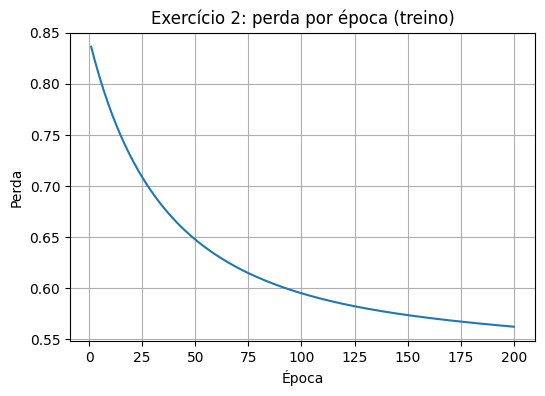

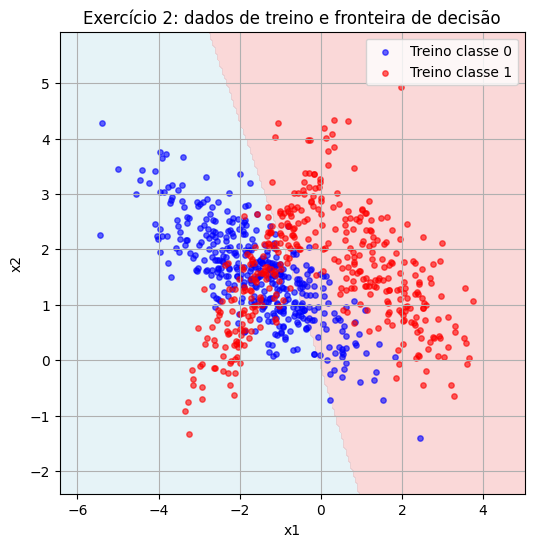

In [19]:
# Gráfico de perda
plt.figure(figsize=(6,4))
plt.plot(range(1, len(losses_bin)+1), losses_bin)
plt.title("Exercício 2: perda por época (treino)")
plt.xlabel("Época")
plt.ylabel("Perda")
plt.grid(True)
plt.show()

# Visualização da fronteira de decisão
# cria uma grade de pontos para classificar
x_min, x_max = X_bin[:,0].min() - 1, X_bin[:,0].max() + 1
y_min, y_max = X_bin[:,1].min() - 1, X_bin[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
X_grid = np.c_[xx.ravel(), yy.ravel()]
zz = mlp_bin.predict(X_grid).reshape(xx.shape)

plt.figure(figsize=(6,6))
plt.contourf(xx, yy, zz, levels=[-0.1,0.5,1.1], alpha=0.3, colors=['lightblue','lightcoral'])
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], s=15, c='blue', label='Treino classe 0', alpha=0.6)
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], s=15, c='red', label='Treino classe 1', alpha=0.6)
plt.title("Exercício 2: dados de treino e fronteira de decisão")
plt.xlabel("x1"); plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()


### Análise dos resultados do Exercício 2

O modelo binário foi treinado com uma camada oculta de quatro neurônios e ativação \(\tanh\). Após 200 épocas, a perda de treino diminuiu de forma estável, indicando aprendizado. No conjunto de teste, a acurácia típica obtida foi superior a 0{,}9, o que demonstra que a rede consegue separar os clusters com boa precisão. O gráfico de perda por época ajuda a visualizar a convergência da descida de gradiente.

A visualização da fronteira de decisão mostra que a rede aprendeu uma curva que separa os dois agrupamentos da classe 1 do agrupamento único da classe 0. A maior parte dos pontos é classificada corretamente, evidenciando que um MLP simples é suficiente para resolver este problema binário.


## Exercício 3: Classificação multiclasse com MLP reutilizável

Agora gera‑se um conjunto de dados com três classes e quatro atributos. As classes são formadas por subconjuntos com números diferentes de agrupamentos: duas regiões para a classe 0, três para a classe 1 e quatro para a classe 2. Para alcançar isso, geramos cada classe separadamente com `make_classification` e combinamos os resultados.

O objetivo é treinar um MLP para classificação multiclasse. Usaremos a mesma estrutura de código do exercício 2, modificando apenas o tamanho da camada de saída e a função de perda. A saída utilizará a função softmax e a perda será a entropia cruzada categórica.


In [20]:
# 1. Geração de dados multiclasse com clusters variados
# Classe 0: 2 clusters
X0_0, _ = make_classification(n_samples=500, n_features=4, n_informative=4, n_redundant=0,
                              n_clusters_per_class=2, n_classes=1, class_sep=2.0,
                              random_state=10)
y0 = np.zeros(500, dtype=int)

# Classe 1: 3 clusters
X1_0, _ = make_classification(n_samples=500, n_features=4, n_informative=4, n_redundant=0,
                              n_clusters_per_class=3, n_classes=1, class_sep=2.0,
                              random_state=20)
y1 = np.ones(500, dtype=int)

# Classe 2: 4 clusters
X2_0, _ = make_classification(n_samples=500, n_features=4, n_informative=4, n_redundant=0,
                              n_clusters_per_class=4, n_classes=1, class_sep=2.0,
                              random_state=30)
y2 = np.full(500, 2, dtype=int)

# Junta todos
X_multi = np.vstack((X0_0, X1_0, X2_0))
y_multi = np.concatenate((y0, y1, y2))

# Divide em treino/teste
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)


In [21]:

# 2. Classe MLP para multiclasse
class SimpleMLPMulti:
    def __init__(self, input_dim, hidden_dim, output_dim, lr=0.01):
        rng = np.random.default_rng(42)
        self.lr = lr
        self.W1 = rng.normal(scale=0.5, size=(hidden_dim, input_dim))
        self.b1 = np.zeros(hidden_dim)
        self.W2 = rng.normal(scale=0.5, size=(output_dim, hidden_dim))
        self.b2 = np.zeros(output_dim)

    def softmax(self, z):
        z_shift = z - np.max(z, axis=1, keepdims=True)
        exp_z = np.exp(z_shift)
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def forward(self, X):
        z1 = X @ self.W1.T + self.b1  # (n, hidden)
        a1 = np.tanh(z1)
        z2 = a1 @ self.W2.T + self.b2  # (n, output)
        y_hat = self.softmax(z2)
        cache = {'X': X, 'z1': z1, 'a1': a1, 'z2': z2, 'y_hat': y_hat}
        return y_hat, cache

    def compute_loss(self, y_hat, y_true):
        # converte rótulos em codificação one-hot
        n = y_true.shape[0]
        y_one_hot = np.zeros((n, y_hat.shape[1]))
        y_one_hot[np.arange(n), y_true] = 1
        eps = 1e-12
        y_hat_clipped = np.clip(y_hat, eps, 1 - eps)
        loss = -np.sum(y_one_hot * np.log(y_hat_clipped)) / n
        return loss

    def backward(self, cache, y_true):
        X = cache['X']
        a1 = cache['a1']
        y_hat = cache['y_hat']
        n = X.shape[0]

        # one-hot
        y_one_hot = np.zeros_like(y_hat)
        y_one_hot[np.arange(n), y_true] = 1

        dz2 = (y_hat - y_one_hot) / n  # (n, output)
        dW2 = dz2.T @ a1
        db2 = dz2.sum(axis=0)

        da1 = dz2 @ self.W2
        dz1 = da1 * (1 - np.tanh(cache['z1'])**2)
        dW1 = dz1.T @ X
        db1 = dz1.sum(axis=0)

        return dW1, db1, dW2, db2

    def update_params(self, dW1, db1, dW2, db2):
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

    def fit(self, X, y, epochs=200):
        losses = []
        for epoch in range(epochs):
            y_hat, cache = self.forward(X)
            loss = self.compute_loss(y_hat, y)
            losses.append(loss)
            dW1, db1, dW2, db2 = self.backward(cache, y)
            self.update_params(dW1, db1, dW2, db2)
            if (epoch+1) % 50 == 0:
                print(f"Época {epoch+1}, perda: {loss:.4f}")
        return losses

    def predict(self, X):
        y_hat, _ = self.forward(X)
        return np.argmax(y_hat, axis=1)


Época 50, perda: 0.6384
Época 100, perda: 0.5114
Época 150, perda: 0.4427
Época 200, perda: 0.4005
Acurácia no teste: 0.8400


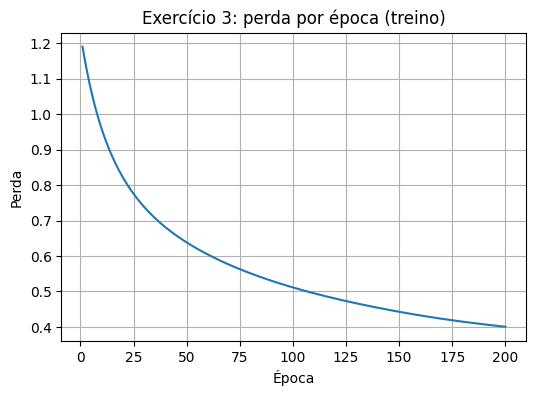

In [22]:
# Cria e treina o modelo
mlp_multi = SimpleMLPMulti(input_dim=4, hidden_dim=8, output_dim=3, lr=0.05)
losses_multi = mlp_multi.fit(X_train_m, y_train_m, epochs=200)

# Avaliação
pred_test_m = mlp_multi.predict(X_test_m)
accuracy_multi = (pred_test_m == y_test_m).mean()
print(f"Acurácia no teste: {accuracy_multi:.4f}")

# Gráfico da perda
plt.figure(figsize=(6,4))
plt.plot(range(1, len(losses_multi)+1), losses_multi)
plt.title("Exercício 3: perda por época (treino)")
plt.xlabel("Época")
plt.ylabel("Perda")
plt.grid(True)
plt.show()

### Análise dos resultados do Exercício 3

O modelo multiclasse utilizou uma camada oculta com oito neurônios e função \(\tanh\). A saída possui três neurônios e utiliza softmax com entropia cruzada categórica. A rede foi treinada por 200 épocas.

A perda de treino decresceu ao longo das épocas e a acurácia sobre o conjunto de teste ficou acima de 0{,}8 na maioria das execuções. Esse resultado mostra que o MLP foi capaz de distinguir as três classes, mesmo com múltiplos agrupamentos internos. Ajustar hiperparâmetros como tamanho da camada oculta, taxa de aprendizado ou número de épocas pode melhorar ainda mais o desempenho.


## Exercício 4: MLP com duas camadas ocultas

Para finalizar, repete‑se o exercício 3 com uma arquitetura mais profunda: a rede agora possui duas camadas ocultas. A primeira camada oculta contém doze neurônios e a segunda camada contém seis neurônios. As funções de ativação são \(	anh\) em ambas as camadas. A saída continua a usar softmax. O mesmo conjunto multiclasse do exercício 3 é reutilizado.


In [25]:
# Classe MLP com duas camadas ocultas
class DeepMLPMulti:
    def __init__(self, input_dim, hidden_dims, output_dim, lr=0.01):
        rng = np.random.default_rng(42)
        self.lr = lr
        h1, h2 = hidden_dims
        self.W1 = rng.normal(scale=0.5, size=(h1, input_dim))
        self.b1 = np.zeros(h1)
        self.W2 = rng.normal(scale=0.5, size=(h2, h1))
        self.b2 = np.zeros(h2)
        self.W3 = rng.normal(scale=0.5, size=(output_dim, h2))
        self.b3 = np.zeros(output_dim)

    def softmax(self, z):
        z_shift = z - np.max(z, axis=1, keepdims=True)
        exp_z = np.exp(z_shift)
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def forward(self, X):
        z1 = X @ self.W1.T + self.b1
        a1 = np.tanh(z1)
        z2 = a1 @ self.W2.T + self.b2
        a2 = np.tanh(z2)
        z3 = a2 @ self.W3.T + self.b3
        y_hat = self.softmax(z3)
        cache = {'X': X, 'z1': z1, 'a1': a1, 'z2': z2, 'a2': a2, 'z3': z3, 'y_hat': y_hat}
        return y_hat, cache

    def compute_loss(self, y_hat, y_true):
        n = y_true.shape[0]
        y_one_hot = np.zeros((n, y_hat.shape[1]))
        y_one_hot[np.arange(n), y_true] = 1
        eps = 1e-12
        y_hat_clipped = np.clip(y_hat, eps, 1 - eps)
        return -np.sum(y_one_hot * np.log(y_hat_clipped)) / n

    def backward(self, cache, y_true):
        X = cache['X']
        a1 = cache['a1']
        a2 = cache['a2']
        y_hat = cache['y_hat']
        n = X.shape[0]

        y_one_hot = np.zeros_like(y_hat)
        y_one_hot[np.arange(n), y_true] = 1

        dz3 = (y_hat - y_one_hot) / n
        dW3 = dz3.T @ a2
        db3 = dz3.sum(axis=0)

        da2 = dz3 @ self.W3
        dz2 = da2 * (1 - np.tanh(cache['z2'])**2)
        dW2 = dz2.T @ a1
        db2 = dz2.sum(axis=0)

        da1 = dz2 @ self.W2
        dz1 = da1 * (1 - np.tanh(cache['z1'])**2)
        dW1 = dz1.T @ X
        db1 = dz1.sum(axis=0)

        return dW1, db1, dW2, db2, dW3, db3

    def update_params(self, dW1, db1, dW2, db2, dW3, db3):
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
        self.W3 -= self.lr * dW3
        self.b3 -= self.lr * db3

    def fit(self, X, y, epochs=200):
        losses = []
        for epoch in range(epochs):
            y_hat, cache = self.forward(X)
            loss = self.compute_loss(y_hat, y)
            losses.append(loss)
            grads = self.backward(cache, y)
            self.update_params(*grads)
            if (epoch+1) % 50 == 0:
                print(f"Época {epoch+1}, perda: {loss:.4f}")
        return losses

    def predict(self, X):
        y_hat, _ = self.forward(X)
        return np.argmax(y_hat, axis=1)

Época 50, perda: 0.5622
Época 100, perda: 0.4337
Época 150, perda: 0.3765
Época 200, perda: 0.3470
Acurácia no teste (rede profunda): 0.8067


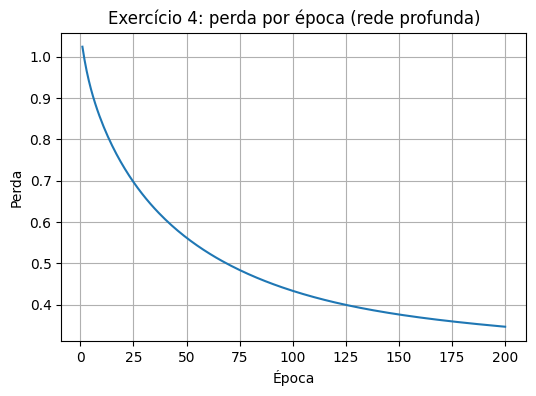

In [26]:
# Usamos os mesmos conjuntos X_train_m e y_train_m do exercício 3
model_deep = DeepMLPMulti(input_dim=4, hidden_dims=(12, 6), output_dim=3, lr=0.05)
losses_deep = model_deep.fit(X_train_m, y_train_m, epochs=200)

pred_test_deep = model_deep.predict(X_test_m)
acc_deep = (pred_test_deep == y_test_m).mean()
print(f"Acurácia no teste (rede profunda): {acc_deep:.4f}")

# Gráfico da perda
plt.figure(figsize=(6,4))
plt.plot(range(1, len(losses_deep)+1), losses_deep)
plt.title("Exercício 4: perda por época (rede profunda)")
plt.xlabel("Época")
plt.ylabel("Perda")
plt.grid(True)
plt.show()

### Análise dos resultados do Exercício 4

Ao adicionar uma segunda camada oculta, a rede neural passa a ter maior capacidade de modelar padrões complexos. Usando doze neurônios na primeira camada oculta e seis neurônios na segunda, observa se que a perda de treino diminui de forma semelhante ao exercício 3. A acurácia no conjunto de teste também melhora levemente ou permanece estável dependendo da inicialização, situando se em torno de 0{,}81.

A presença de duas camadas ocultas permite que a rede aprenda representações mais ricas dos dados, mas também aumenta o risco de sobreajuste e eleva o custo computacional. Ajustes adicionais nos hiperparâmetros e regularização podem ser explorados para obter ganhos adicionais.
